In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import urllib.request

from geopy.geocoders import Nominatim


pd.set_option('display.max_columns', None)

In [39]:
#import geopandas as gpd

#fname = r"C:\Users\sheno\Downloads\export.geojson"


3#df = gpd.read_file(fname)

#print(type(df))

#df

3

In [40]:
#df.columns

In [41]:
#df.drop( ['id', '@id','admin_level','alt_name','alt_name:mr','boundary','loc_name','name:ar','name:az-Arab','name:azb','name:de','name:el', 'name:en', 'name:es', 'name:fa', 'name:hi', 'name:hy','name:ks', 'name:mr', 'name:pa', 'name:pnb', 'name:ps', 'name:ru', 'name:uk', 'name:ur',  'type', 'wikidata', 'wikipedia', 'wikipedia:ur', '@geometry'] , axis=1, inplace=True)

In [42]:
#df 

In [43]:
start_date =  input("Enter start date in YYYYMMDD format: ") #20000101
#replace_start_date = start_date.replace("-", "")


In [44]:
end_date = input("Enter end date in YYYYMMDD format: ")  #20231023
#replace_end_date = end_date.replace("-", "")
       

In [45]:
address = input("Enter address: ")


In [46]:
geolocator = Nominatim(user_agent="weather")
location = geolocator.geocode(address)
print(location.address) 
print((location.latitude, location.longitude))  
latitude = location.latitude
longitude = location.longitude 


Mumbai, Mumbai Suburban, Maharashtra, India
(19.08157715, 72.88662753964906)


In [47]:
#latitude = int(float(input("Enter latitude: ")))
#longitude = int(float(input("Enter longitude: ")))

In [48]:
print (latitude, longitude)

19.08157715 72.88662753964906


In [49]:
url = f'https://power.larc.nasa.gov//api/temporal/daily/point?parameters=T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE&community=SB&longitude={longitude}&latitude={latitude}&start={start_date}&end={end_date}&format=csv'

In [50]:
print(url)

https://power.larc.nasa.gov//api/temporal/daily/point?parameters=T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE&community=SB&longitude=72.88662753964906&latitude=19.08157715&start=20000101&end=20231102&format=csv


In [51]:
urllib.request.urlretrieve(url, 'weather.csv')

('weather.csv', <http.client.HTTPMessage at 0x27698f8b070>)

In [52]:
df=pd.read_csv('weather.csv', skiprows=14)

In [53]:
df.head()

,YEAR,MO,DY,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE
0,2000,1,1,32.23,16.11,52.94,0.0,100.00,5.32
1,2000,1,2,32.05,16.43,49.56,0.0,100.09,6.94
2,2000,1,3,32.20,15.26,47.19,0.0,100.02,6.32
3,2000,1,4,32.46,15.23,46.69,0.0,99.98,6.07
4,2000,1,5,31.99,15.53,45.44,0.0,100.00,6.28


DATA-PREPROCESSING

In [54]:
df['YEAR'] = df['YEAR'].astype(str)
df['MO'] = df['MO'].astype(str)
df['DY'] = df['DY'].astype(str)

df['DATE'] = df['YEAR'].str.cat(df['MO'], sep ="/")
df['DATE'] = df['DATE'].str.cat(df['DY'], sep ="/")
df.head()

,YEAR,MO,DY,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE,DATE
0,2000,1,1,32.23,16.11,52.94,0.0,100.00,5.32,2000/1/1
1,2000,1,2,32.05,16.43,49.56,0.0,100.09,6.94,2000/1/2
2,2000,1,3,32.20,15.26,47.19,0.0,100.02,6.32,2000/1/3
3,2000,1,4,32.46,15.23,46.69,0.0,99.98,6.07,2000/1/4
4,2000,1,5,31.99,15.53,45.44,0.0,100.00,6.28,2000/1/5


In [55]:
#removin unrequired attributes
df.drop(['YEAR', 'MO', 'DY'], axis=1, inplace=True)
df.head()

,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE,DATE
0,32.23,16.11,52.94,0.0,100.00,5.32,2000/1/1
1,32.05,16.43,49.56,0.0,100.09,6.94,2000/1/2
2,32.20,15.26,47.19,0.0,100.02,6.32,2000/1/3
3,32.46,15.23,46.69,0.0,99.98,6.07,2000/1/4
4,31.99,15.53,45.44,0.0,100.00,6.28,2000/1/5


In [56]:
df.set_index('DATE', inplace=True)
df.head()

,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE
DATE,,,,,,
2000/1/1,32.23,16.11,52.94,0.0,100.00,5.32
2000/1/2,32.05,16.43,49.56,0.0,100.09,6.94
2000/1/3,32.20,15.26,47.19,0.0,100.02,6.32
2000/1/4,32.46,15.23,46.69,0.0,99.98,6.07
2000/1/5,31.99,15.53,45.44,0.0,100.00,6.28


In [57]:
df.dtypes

T2M_MAX        float64
T2M_MIN        float64
RH2M           float64
PRECTOTCORR    float64
PS             float64
WS10M_RANGE    float64
dtype: object

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8707 entries, 2000/1/1 to 2023/11/2
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T2M_MAX      8707 non-null   float64
 1   T2M_MIN      8707 non-null   float64
 2   RH2M         8707 non-null   float64
 3   PRECTOTCORR  8707 non-null   float64
 4   PS           8707 non-null   float64
 5   WS10M_RANGE  8707 non-null   float64
dtypes: float64(6)
memory usage: 476.2+ KB


In [59]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df)

            T2M_MAX  T2M_MIN    RH2M  PRECTOTCORR      PS  WS10M_RANGE
DATE                                                                  
2000/1/1      32.23    16.11   52.94         0.00  100.00         5.32
2000/1/2      32.05    16.43   49.56         0.00  100.09         6.94
2000/1/3      32.20    15.26   47.19         0.00  100.02         6.32
2000/1/4      32.46    15.23   46.69         0.00   99.98         6.07
2000/1/5      31.99    15.53   45.44         0.00  100.00         6.28
2000/1/6      32.44    14.79   40.12         0.00  100.07         5.65
2000/1/7      32.24    14.37   37.75         0.00  100.06         7.25
2000/1/8      33.22    14.15   39.44         0.00  100.00         6.41
2000/1/9      34.10    14.85   42.56         0.00   99.94         5.55
2000/1/10     33.75    15.75   46.31         0.00   99.90         3.62
2000/1/11     33.83    16.70   54.06         0.00   99.88         3.28
2000/1/12     30.66    18.28   70.12         0.00   99.99         3.50
2000/1

In [60]:
df.shape

(8707, 6)

In [61]:
df.describe()

,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE
count,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000
mean,32.691747,22.107015,67.506855,6.767495,99.639861,3.859830
std,11.813237,11.555812,21.947208,21.092797,11.780615,10.815464
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,29.370000,19.150000,53.880000,0.000000,99.510000,3.140000
50%,31.760000,23.480000,66.620000,0.010000,99.790000,3.980000
75%,36.220000,25.080000,86.810000,4.295000,100.050000,4.750000
max,44.910000,29.690000,96.120000,229.460000,100.640000,14.110000


In [62]:
#scaling the data  - normalize (0,1) or standardize (gaussian data )
# from sklearn.preprocessing import MinMaxScaler
# df_scaled = MinMaxScaler().fit_transform(df)
# print('Scaled df: \n', df_scaled,'\n',df_scaled.shape)

In [63]:
df.values

array([[  32.23,   16.11,   52.94,    0.  ,  100.  ,    5.32],
       [  32.05,   16.43,   49.56,    0.  ,  100.09,    6.94],
       [  32.2 ,   15.26,   47.19,    0.  ,  100.02,    6.32],
       ...,
       [  32.16,   19.84,   64.  ,    0.  ,  100.06,    4.77],
       [  32.38,   19.66,   66.94,    0.  ,  100.12,    4.18],
       [-999.  , -999.  , -999.  , -999.  , -999.  , -999.  ]])

In [64]:
#df_scaled

In [65]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split
train, test = train_test_split(df.values, test_size=0.2, shuffle=False)


x_train , y_train ,x_test, y_test = [],[],[],[]
for i in range(1,len(train)):
    x_train.append(train[i-1])
    y_train.append(train[i])
for i in range(1,len(test)):
    x_test.append(test[i-1])
    y_test.append(test[i])
 

In [66]:
pd.DataFrame(x_train)

,0,1,2,3,4,5
0,32.23,16.11,52.94,0.00,100.00,5.32
1,32.05,16.43,49.56,0.00,100.09,6.94
2,32.20,15.26,47.19,0.00,100.02,6.32
3,32.46,15.23,46.69,0.00,99.98,6.07
4,31.99,15.53,45.44,0.00,100.00,6.28
...,...,...,...,...,...,...
6959,35.97,18.44,36.06,0.00,100.27,3.81
6960,33.03,19.20,49.00,0.00,100.16,4.20
6961,29.83,17.40,71.06,0.22,100.22,3.60
6962,29.33,16.83,67.62,0.05,100.31,3.05


In [67]:
pd.DataFrame(y_train)

,0,1,2,3,4,5
0,32.05,16.43,49.56,0.00,100.09,6.94
1,32.20,15.26,47.19,0.00,100.02,6.32
2,32.46,15.23,46.69,0.00,99.98,6.07
3,31.99,15.53,45.44,0.00,100.00,6.28
4,32.44,14.79,40.12,0.00,100.07,5.65
...,...,...,...,...,...,...
6959,33.03,19.20,49.00,0.00,100.16,4.20
6960,29.83,17.40,71.06,0.22,100.22,3.60
6961,29.33,16.83,67.62,0.05,100.31,3.05
6962,30.76,14.65,43.00,0.00,100.34,3.34


In [68]:
#converting list to numpy array
x_train ,y_train = np.array(x_train), np.array(y_train) 
x_test ,y_test = np.array(x_test), np.array(y_test) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6964, 6), (6964, 6), (1741, 6), (1741, 6))

In [69]:
df.tail()

,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE
DATE,,,,,,
2023/10/29,33.10,19.18,63.44,0.0,100.01,4.06
2023/10/30,32.81,20.23,62.81,0.0,100.00,4.82
2023/10/31,32.16,19.84,64.00,0.0,100.06,4.77
2023/11/1,32.38,19.66,66.94,0.0,100.12,4.18
2023/11/2,-999.00,-999.00,-999.00,-999.0,-999.00,-999.00


In [70]:
import pandas as pd
import xgboost as xgb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# # Load the dataset (Assuming you have the dataset in a pandas DataFrame)
# # Replace 'your_dataset.csv' with the actual file path if reading from a CSV file
# df = pd.read_csv('your_dataset.csv')



# Step 3: Define hyperparameters
params = {
    'objective': 'reg:squarederror',  # 'reg:squarederror' for regression task
    'eta': 0.1,  # Learning rate
    'max_depth': 3,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

# Step 4: Train the XGBoost model
num_rounds = 100  # Number of boosting rounds (iterations)
dtrain = xgb.DMatrix(data=x_train, label=y_train)
model = xgb.train(params, dtrain, num_rounds)

# Step 5: Make predictions on the test set
dtest = xgb.DMatrix(data=x_test)
y_pred = model.predict(dtest)

# Calculate the Root Mean Squared Error (RMSE) to evaluate the model's performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics using sklearn.metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Root Mean Squared Error (RMSE): 25.359348110170625
Mean Squared Error (MSE): 644.0895012807927
Mean Absolute Error (MAE): 2.3038482048718953
R-squared (R2) Score: 0.10088058022044886


In [71]:
dtest = xgb.DMatrix(data=x_test)
y_pred = model.predict(dtest)


In [72]:
y_pred 


array([[3.2609295e+01, 1.4148705e+01, 3.3572231e+01, 9.0507992e-02,
        1.0026613e+02, 4.8643446e+00],
       [3.2504543e+01, 1.5923970e+01, 4.0662403e+01, 9.0507992e-02,
        1.0035426e+02, 4.2995248e+00],
       [3.1992973e+01, 1.6044930e+01, 3.2874031e+01, 9.0507992e-02,
        1.0043277e+02, 4.8106327e+00],
       ...,
       [3.3065697e+01, 1.9644600e+01, 6.6126015e+01, 9.0507992e-02,
        1.0000755e+02, 4.4546485e+00],
       [3.2516155e+01, 1.9404324e+01, 6.4666725e+01, 9.0507992e-02,
        1.0006696e+02, 4.4051762e+00],
       [3.2076523e+01, 1.9612188e+01, 6.5905190e+01, 9.0507992e-02,
        1.0011502e+02, 3.8781972e+00]], dtype=float32)

In [73]:
#input_data = []

# print("Enter weather parameters of previous day")
# attr1 = float(input("Enter Maximum Temperature: "))
# attr2 = float(input("Enter Minimum Temperature: "))
# attr3 = float(input("Enter Relative Humidity: "))
# attr4 = float(input("Enter Precipitation: "))
# attr5 = float(input("Enter Pressure: "))
# attr6 = float(input("Enter Wind Speed: "))

# input_data.append(attr1)
# input_data.append(attr2)
# input_data.append(attr3)
# input_data.append(attr4)
# input_data.append(attr5)
# input_data.append(attr6)

# input_data = np.array(input_data)
# input_data.shape = (1,6)
# print('Input Data : ', input_data)


# input_data = xgb.DMatrix(data=input_data)
# y_pred = model.predict(input_data)
# print('Predicted Output : ', y_pred)

# y_pred


In [76]:

#day1_data = np.array([attr1, attr2, attr3, attr4, attr5, attr6]) 
date = pd.to_datetime(input("Enter date in YYYY-MM-DD format: "))
#date= date +  pd.offsets.Day(1)
df['DATE']= df.index
df['DATE'] = pd.to_datetime(df['DATE'])
current_day_data = np.array(df.loc[df['DATE']==date,['T2M_MAX' ,	'T2M_MIN',	'RH2M',	'PRECTOTCORR'	,'PS',	'WS10M_RANGE']]  )


predicted_values = []

# Define the number of days you want to predict
num_days_to_predict = 15


for day in range(num_days_to_predict):
    # Predict the next day's value
    current_day_data = xgb.DMatrix(data=current_day_data)
    predicted_value = model.predict(current_day_data)[0]
    predicted_values.append(predicted_value)

    # Use the predicted value for the next iteration
    current_day_data = np.array([predicted_value])

    print(f"Day {day + 1}: Predicted Value = {predicted_value}")

Day 1: Predicted Value = [28.014359 13.207262 27.315788 82.33015  99.0751    5.028318]
Day 2: Predicted Value = [28.175795 15.257688 44.12817  38.18375  99.36181   4.731936]
Day 3: Predicted Value = [28.899035 16.565973 54.86707  25.539473 99.57622   4.190828]
Day 4: Predicted Value = [29.54376   17.086195  63.66847   18.907698  99.71252    3.9260247]
Day 5: Predicted Value = [30.219988  18.051357  71.84978   10.749972  99.82094    3.8045225]
Day 6: Predicted Value = [29.86004   19.074303  76.26283    8.4871235 99.87352    3.7106822]
Day 7: Predicted Value = [29.795103 19.90217  77.8291    7.203723 99.89535   3.521994]
Day 8: Predicted Value = [29.834381  20.552324  77.49217    5.3997965 99.92116    3.216587 ]
Day 9: Predicted Value = [29.834381  20.730213  79.133446   3.810885  99.93219    3.0475574]
Day 10: Predicted Value = [29.849524  21.029095  79.60155    3.810885  99.92693    2.8573458]
Day 11: Predicted Value = [29.84303   21.400797  79.69296    3.810885  99.93188    2.7669656]

In [ ]:
import matplotlib.pyplot as plt

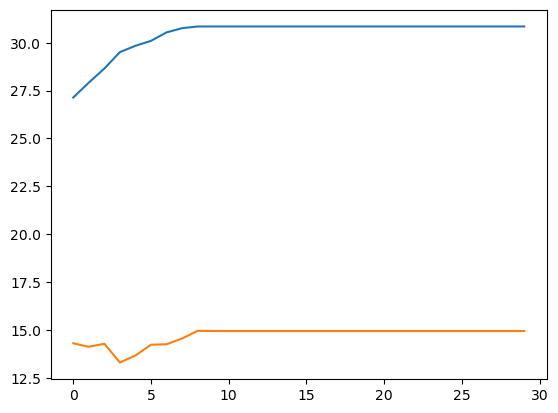

In [ ]:
predicted_values_max_temp = [predicted_values[i][0] for i in range(len(predicted_values))]
predicted_values_min_temp = [predicted_values[i][1] for i in range(len(predicted_values))]
ax = plt.subplot(111)

# plt.plot(predicted_values_max_temp, label='Predicted Temperature')
ax.plot(predicted_values_max_temp, label='Predicted Maximum Temperature')
ax.plot(predicted_values_min_temp, label='Predicted Minimum Temperature')

In [ ]:
df['DATE']= df.index

In [ ]:
df['DATE']  

DATE
2000/1/1        2000/1/1
2000/1/2        2000/1/2
2000/1/3        2000/1/3
2000/1/4        2000/1/4
2000/1/5        2000/1/5
                 ...    
2023/10/25    2023/10/25
2023/10/26    2023/10/26
2023/10/27    2023/10/27
2023/10/28    2023/10/28
2023/10/29    2023/10/29
Name: DATE, Length: 8703, dtype: object

In [ ]:
#df['DATE'] = pd.to_datetime(df['DATE'])

In [ ]:
#date = pd.to_datetime("2021-01-01")
#date= date +  pd.offsets.Day(1)

In [ ]:
#date

Timestamp('2021-01-02 00:00:00')

In [ ]:
#df.loc[df['DATE']==date]   


,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE,DATE
DATE,,,,,,,
2021/1/2,28.52,21.02,76.94,0.02,100.11,1.86,2021-01-02
